In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [2]:
# Load the deduplicated dataset
df = pd.read_csv("after_dedup.csv")

# Display basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 1694 non-null   object 
 1   model                      1694 non-null   object 
 2   price                      1694 non-null   int64  
 3   rating                     1694 non-null   int64  
 4   has_5g                     1694 non-null   int64  
 5   processor_brand            1694 non-null   object 
 6   num_cores                  1694 non-null   int64  
 7   processor_speed            1694 non-null   float64
 8   battery_capacity           1694 non-null   object 
 9   fast_charging_available    1694 non-null   int64  
 10  ram_capacity               1694 non-null   int64  
 11  internal_memory            1694 non-null   int64  
 12  screen_size                1694 non-null   float64
 13  refresh_rate               1694 no

In [3]:
# -------------------------------
# Step 1: Remove Outliers in 'price' using IQR
# -------------------------------
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [4]:
# -------------------------------
# Step 2: Fill Missing Values
# -------------------------------
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\T8614\AppData\Local\Temp\ipykernel_18192\2559669815.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\T8614\AppData\Local\Temp\ipykernel_18192\2559669815.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
# -------------------------------
# Step 3: Encode Categorical Variables
# -------------------------------
label_encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = label_encoder.fit_transform(df[col])
    elif df[col].nunique() <= 10:
        df = pd.get_dummies(df, columns=[col], prefix=col)
    else:
        df[col] = label_encoder.fit_transform(df[col])

In [6]:

# -------------------------------
# Step 4: Convert Data Types if Needed
# -------------------------------
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# -------------------------------
# Step 5: Save the Preprocessed Dataset
# -------------------------------
df.to_csv("after_dedup_preprocessed.csv", index=False)
print("✅ Preprocessing complete. Saved as 'after_dedup_preprocessed.csv'")

✅ Preprocessing complete. Saved as 'after_dedup_preprocessed.csv'


In [7]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Data Overview:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


Summary Statistics:
         brand_name       model          price       rating       has_5g  \
count   1590.000000  1590.00000    1590.000000  1590.000000  1590.000000   
unique          NaN         NaN            NaN          NaN          NaN   
top             NaN         NaN            NaN          NaN          NaN   
freq            NaN         NaN            NaN          NaN          NaN   
mean      27.366667   783.90566   35240.975472    77.157862     0.789937   
std       12.026854   453.76458   26322.475394     7.992105     0.407481   
min        0.000000     0.00000    3499.000000    60.000000     0.000000   
25%       19.000000   390.25000   15499.000000    71.000000     1.000000   
50%       29.000000   786.50000   25000.000000    78.000000     1.000000   
75%       35.000000  1177.75000   45999.000000    84.000000     1.000000   
max       43.000000  1570.00000  110999.000000    90.000000     1.000000   

        processor_brand    num_cores  processor_speed  battery_cap

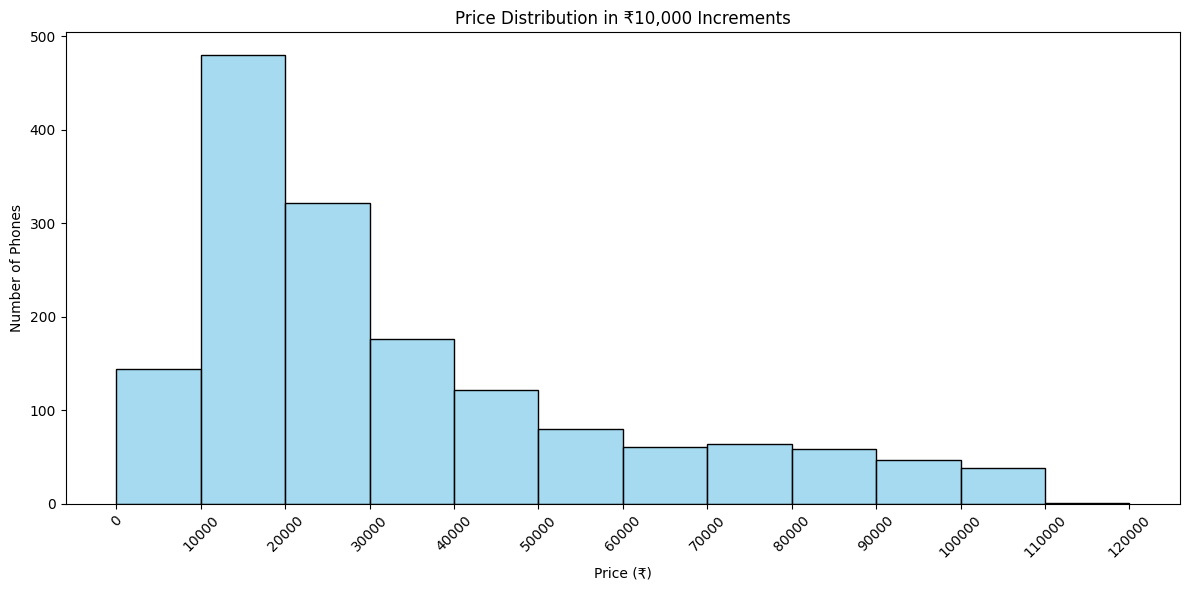

In [8]:
plt.figure(figsize=(12, 6))
bin_edges = list(range(0, int(df['price'].max()) + 10000, 10000))
sns.histplot(df['price'], bins=bin_edges, kde=False, color='skyblue', edgecolor='black')
plt.title("Price Distribution in ₹10,000 Increments")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Phones")
plt.xticks(bin_edges, rotation=45)
plt.tight_layout()
plt.show()

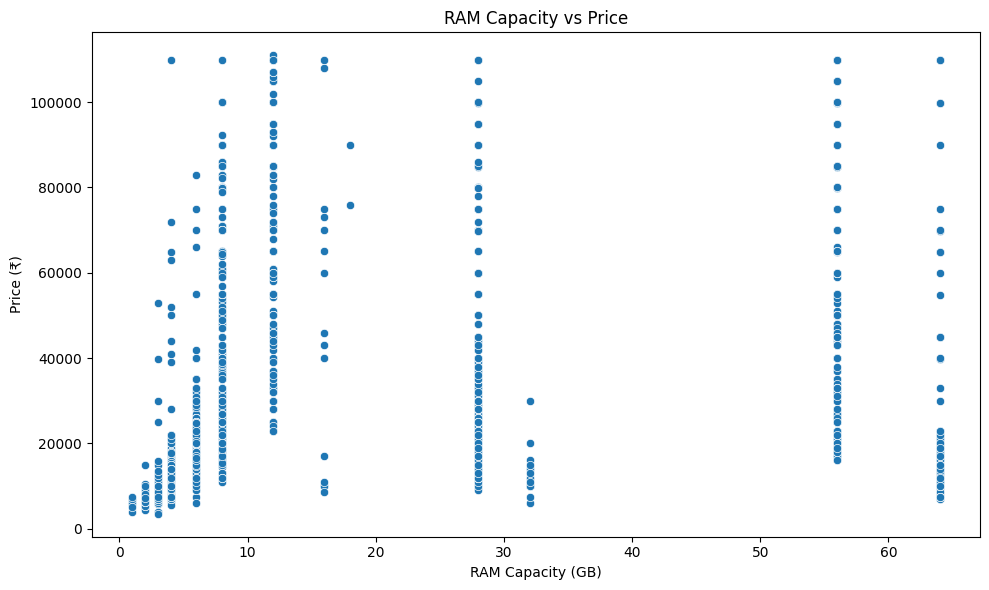

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ram_capacity', y='price')
plt.title("RAM Capacity vs Price")
plt.xlabel("RAM Capacity (GB)")
plt.ylabel("Price (₹)")
plt.tight_layout()
plt.show()

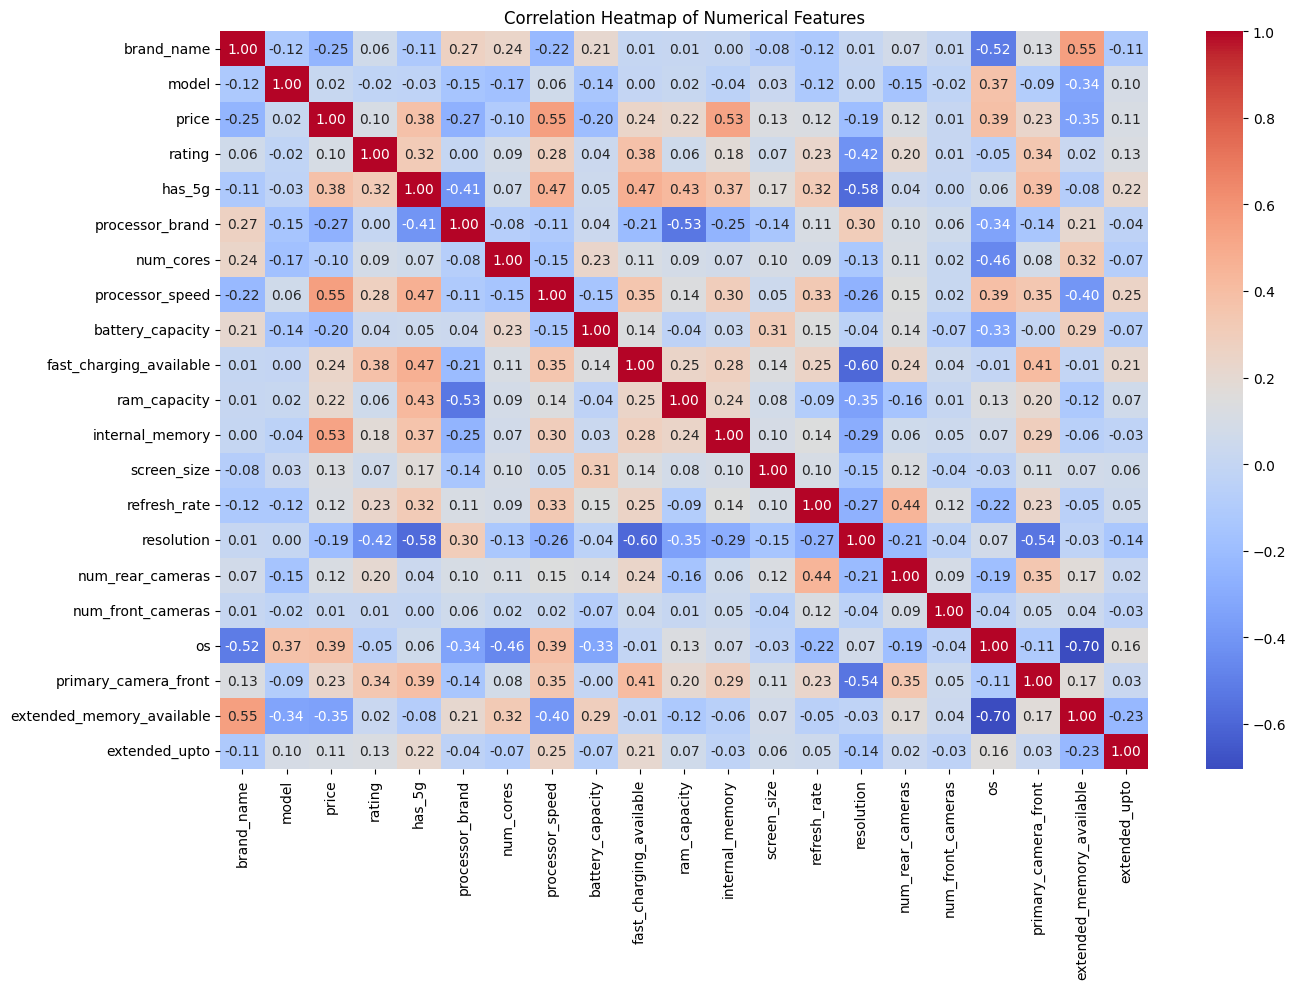

In [10]:
plt.figure(figsize=(14, 10))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

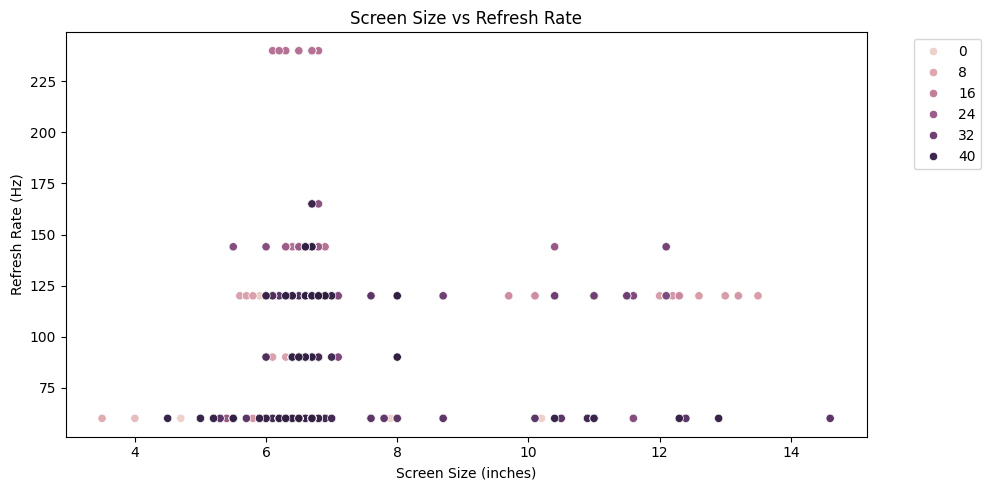

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='screen_size', y='refresh_rate', hue='brand_name')
plt.title("Screen Size vs Refresh Rate")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Refresh Rate (Hz)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\T8614\AppData\Local\Temp\ipykernel_18192\12327471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='has_5g', palette='Set2')


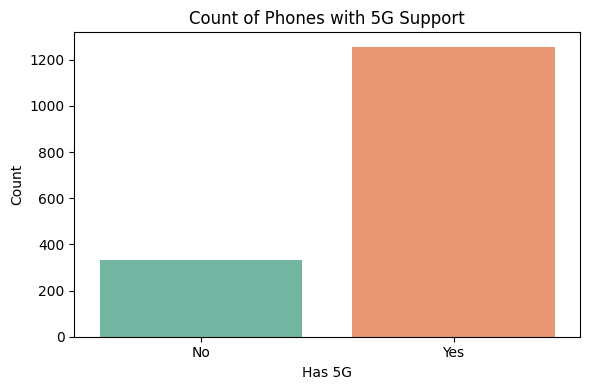

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='has_5g', palette='Set2')
plt.title("Count of Phones with 5G Support")
plt.xlabel("Has 5G")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()